# [SWCON253] Machine Learning
Instructor: Eunseop Shin (kairos9603@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1.A:  Pure Python만을 이용하여 Perceptron 구현 (5점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptorn binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanila" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 데이터셋 loading
- 2) Perceptron Model 구현 **<직접 구현>**
- 3) Perceptron Model 학습
- 4) Perceptron Model 검증
- 5) Decision Boundary 시각화
- 6) Discussion

**이번 실습에서 여러분은 `2) Perceptron Model 구현` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- Perceptron model 구현: 각 함수별로 1점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## 0) Imports
**수정하지 마세요.** HW1에서는 "pure" python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
**수정하지 마세요.** 코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [23]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


### Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [24]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

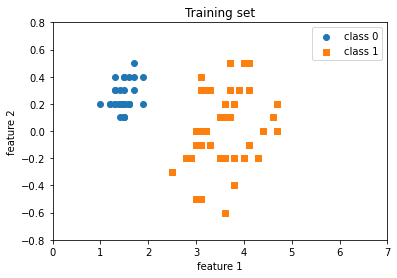

In [25]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위해 에러를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation은 0.이상은 1., 이하는 0.으로 하도록한다.
- 설명되지 않은 사항은 자유롭게 작성하고 주석으로 설명한다.

#### Perceptorn
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [73]:
class Perceptron():
    def __init__(self, num_features):
        random.seed(123)
        self.weights = [random.random() for r in range(num_features)]
        self.bias = 0
        self.lr_rate = 0.01 # learning rate 
    def forward(self, x): 
        x_calc = [0.] * len(x)
        # 1. 계산 수행
        for idx in range(len(x)):
            x_calc[idx] =  x_calc[idx] + self.weights[idx] * x[idx] + self.bias

        # 2. 활성화 함수 수행
        prediction = self.step(x_calc)
        
        return prediction
        
        
    def step(self, x):
        prediction = [0] * len(x)
        for i in range(len(x)):
            if x[i] >= 0:
                prediction[i] = 1
            else:
                prediction[i] = 0

        return prediction 
    
    def backward(self, x, y):
        # error rate of each weight
        # y = 1 or 0
        # x = 1 or 0
        errors = [0.] * len(x)
        
        ''' error 계산을 어떤 기준으로? '''
        for idx in range(len(x)):
            errors[idx] = y - x[idx]
        
        return errors
        
    def train(self, x, y, epochs):
         
        # epochs 만큼 학습
        for e in range(epochs):
            # 데이터 하나씩 학습
            for i in range(len(y)):
                
                stalled_cnt = 0
                improve = True # check room to improve
                prev_errors = [0.,0.]
                while improve:
                    #forward
                    x_out = self.forward(x[i]) #x_out = 0 or 1
                    #backward
                    errors = self.backward(x_out,y[i])
                    #가중치 학습
                    for idx, err in enumerate(errors):
                        if err != 0:
                            self.weights[idx] = self.weights[idx] - self.lr_rate * self.weights[idx]

                    #stop condition check    
                    for idx, err in enumerate(errors):
                        if prev_errors[idx] == err: # 에러에 진전이 없으면 
                            stalled_cnt = stalled_cnt + 1 # 가중치 update stop condition
                            if stalled_cnt == 10: # stall count 10 도달하면 스탑
                                improve = False            
                        else:
                            continue
                        
                    prev_errors[:] = errors[:] 
                    
                
    def evaluate(self, x, y):
        x_out = []
        error = []
        error_sum = 0.
        
        for idx,elem in enumerate(x):
            #forward
            x_out.append(self.forward(elem))
            #backward
            error.append(self.backward(x_out[idx], y[idx]))
        
        for err in error:
            error_sum = error_sum + abs(err[0]) + abs(err[1]) 
        
        accuracy = (error_sum / (len(x))*2)
        
        return accuracy

## 3) Perceptron 학습

작성한 Perceptorn을 Trainset을 이용해 5 epoch 학습하고 학습된 weight, bias를 print합니다.

In [74]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 5)    # 5 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[4.094559309918976e-07, 2.2166071397939633e-09]
0


## 4) 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [75]:
# Train dataset에서 성능 검증
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 242.50%


In [76]:
## Test dataset에서 성능 검증
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 240.00%


## 5) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

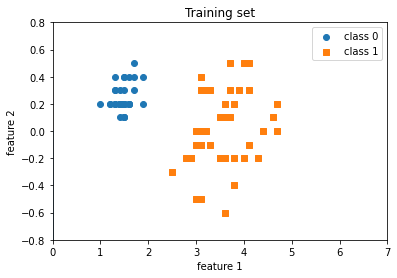

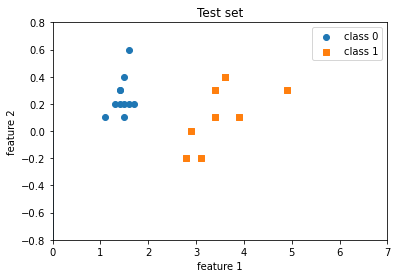

In [77]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 6) Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]

**2) 단층 Perceptron 으로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]

**3) 구현하면서 든 질문에 대해 적어보세요. 그리고 질문에 답할 수 있다면 스스로 답해보세요.**

[답변작성]

---

# P1.B:  Deep Learning Framwork: Pytorch를 이용하여 MLP 구현 (5점)

### 학습목표
- pytorch를 사용하여 구현된 MLP 구조를 이해하고 수정할수 있다.
- Fashinon-MNIST 문제를 스스로 해결하면서 딥러닝 학습과정을 이해하고 하이퍼파라미터를 튜닝을 할 수 있다.

### 실습내용
pytorch를 사용하여 구현 되어 있는 MLP를 통해 Fashion-MNIST 데이터셋을 분류하는 classfier를 학습합니다.

실습은 다음 순서로 진행됩니다.
- 1) Fashon-MNIST 데이터셋 설명
- 2) Data loading
- 3) Multilayer Perceptron Model
- 4) Training
- 5) Evaluation
- 6) Discussion

아래 코드에는 2개의 퍼셉트론은 이용한 MLP 모델이 정의 되어 있습니다.
실습을 시작하기전에 이 노트북 파일을 읽고 모든 셀을 실행해하여 올바르게 작동하는지 확인하세요.<br>
이후에 아키텍쳐를 마음껏 변경하여 최고의 성능이 나오도록 수정해 보세요.

다음은 변경 가능한 부분입니다.
- activation 함수 (logistic sigmoid, tanh, relu, leaky relu, ...)
- learning rate
- hidden layers 갯수
- minibatch size

그러나 다음 사항은 변경하지 마세요.
- 가중치 초기화 방법
- 랜덤시드
- 최적화 방법, 학습 방법
- epochs

(Optional) layer를 추가하여 2개 이상의 hidden layer를 구성할 수 있습니다. <br>
이 사항은 필수가 아닙니다. 하지만 구현하여 기준점수에 도달한 경우 **추가점수 +2점**이 있습니다.

수정가능한 셀은 아래 주석으로 확실하게 하이라이트되어 표시되어 있습니다.

```
############################################################
# 변경 가능한 셀
############################################################
```

### 점수
**Test set 기준**

- 정확도 85% 이상 2점
- 정확도 86% 이상 3점
- 정확도 87% 이상 4점
- 정확도 88% 이상 5점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [1]:
import torch
import os
import pandas as pd
import numpy as np
import time
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 이 부분은 절대 변경하지 마세요.

RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## 1) Dataset 설명

이 데이터셋은 기존의 MNIST와 비슷하게 10개의 클래스로 이루어진 데이터셋입니다. 또한 흑백의 28x28크기, 60k개의 학습용 이미지와 10k개의 테스트용 이미지로 구성 되어 있는것과 같이 MNIST와 대부분 비슷한 구조로 이뤄져 있습니다. 

아래는 데이터셋의 샘플 이미지 입니다.

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

출처: https://github.com/zalandoresearch/fashion-mnist)



데이터셋의 10개의 클래스는 다음과 같습니다.


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## 2) Dataset Loader

In [3]:
import torch
from PIL import Image
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd

import os

In [4]:
# Train 데이터 로딩시 데이터 Transform
# Random Flip, Random Crop 등을 사용하여 Data augmentation을 수행하고 이를 통해 좋은 성능을 얻을 수 있습니다.
# 하지만, 이번 실습에서는 사용하지 않습니다.
custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [5]:
Han# Test 데이터 로딩시 데이터 Transform
# Testset의 Trainsform은 Training set 과 다르게 랜덤하게 변경되면 안됩니다.
# 이번 실습에서는 사용하지 않습니다.
custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [6]:
############################################################
# 변경 가능한 셀
############################################################

BATCH_SIZE = 10 # 60000을 사용하면 Full-Batch 학습

In [7]:
train_dataset = FashionMNIST(".", train=True, download=True, transform=custom_train_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=2)


test_dataset = FashionMNIST(".", train=False, download=True, transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

아래 셀은 데이터셋이 잘 Load 되었는지 확인하는 테스트용 코드입니다.

In [8]:
num_epochs = 2
for epoch in range(num_epochs):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        print('break minibatch for-loop')
        break

Epoch: 1 | Batch index: 0 | Batch size: 10
break minibatch for-loop
Epoch: 2 | Batch index: 0 | Batch size: 10
break minibatch for-loop


## 3) Multilayer Perceptron Model

아래 셀은 MLP모델을 정의하는 부분입니다. 이 과제에서 메인 부분입니다.

In [9]:
Jun############################################################
# 변경 가능한 셀 
############################################################

class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_hidden_3, num_classes):
        super(MLP, self).__init__()
        
        self.num_classes = num_classes
        
        ### (optional)레이어 추가 가능
        # @ params : (num of input X, num of output h(x))
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1) 
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_3 = torch.nn.Linear(num_hidden_2, num_hidden_3)        
        self.linear_out = torch.nn.Linear(num_hidden_3, num_classes)

        
    def forward(self, x):
        
        ### activation 함수 변경 가능
        ### (optional)레이어간의 연결 추가, 변경 가능
        '''1층 layer : aX + b -> relu '''
        out = self.linear_1(x) # 50개 값 나옴
        out = torch.relu(out)
        '''2층 layer : aX + b -> relu '''
        out2 = self.linear_2(out) # 20개의 값 나옴 
        out2 = torch.relu(out2)
      
        '''3층 layer : aX + b -> relu '''
        out3 = self.linear_3(out2) # 10개의 값 나옴 
        out3 = torch.relu(out3)


        '''3층 layer : aX + b -> relu '''
        logits = self.linear_out(out3) # 10개의 값 나옴 
        probas = torch.relu(logits)

        return logits, probas

    
#################################
### Model 초기화
#################################

# random seed는 무작위 가중치 초기화가 항상 같도록 해줍니다.
# 초기화된 가중치에 따라 같은 네트워크도 서로 다른 성능을 낼 수 있어서 
# 실제 사용시에는 좋은 성능을 얻기 위해 여러가지 무작위 가중치를 시도해 볼 수 있습니다.
# 그러나 이 과제에서는 변경하지 않습니다.
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

### 모델의 hidden_layer갯수(num_hidden_1`를 변경하고싶거나, 
### (optional)레이어를 추가하였다면,
### 이부분을 알맞게 수정하세요.
model = MLP(num_features=28*28,
            num_hidden_1=50,
            num_hidden_2=20, 
            num_hidden_3=10,             
            num_classes=10)

model = model.to(DEVICE)

## 4) Training

In [15]:
############################################################
# 변경 가능한 셀
############################################################

### Optimizer는 가중치를 업데이트하는 방법을 바꾸어 더 빠르게 좋은 성능을 낼 수 있도록합니다.
### 이 과제에서는 optimizer를 변경하지 않습니다. 
### 그러나 Learning Rate(lr)는 변경이 가능합니다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
############################################################

In [16]:
NUM_EPOCHS = 20

In [17]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

start_time = time.time()
train_acc_lst, test_acc_lst = [], []
train_loss_lst, test_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 40:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # 매 Epoch마다 evaluation을 진행합니다. 
    # Epoch마다 Loss를 기록하여 학습과정을 살펴보고 Underfitting, Overfitting 여부를 확인합니다.
    model.eval()
    with torch.set_grad_enabled(False): # Gradient 계산이 안되도록
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=DEVICE) # train acc, loss 계산
        test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, device=DEVICE)    # test acc, loss 계산
        
        # list에 train, test의  acc, loss 추가
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        train_loss_lst.append(train_loss)
        test_loss_lst.append(test_loss)
        
        # 로깅
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Test Acc.: {test_acc:.2f}%')
    
    # 1 epoch 학습 소요시간
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')

# 총 학습 소요시간
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/020 | Batch 000/6000 | Cost: 0.3201
Epoch: 001/020 | Batch 040/6000 | Cost: 0.9479
Epoch: 001/020 | Batch 080/6000 | Cost: 0.1213
Epoch: 001/020 | Batch 120/6000 | Cost: 0.0558
Epoch: 001/020 | Batch 160/6000 | Cost: 0.2474
Epoch: 001/020 | Batch 200/6000 | Cost: 0.1659
Epoch: 001/020 | Batch 240/6000 | Cost: 0.5140
Epoch: 001/020 | Batch 280/6000 | Cost: 0.1740
Epoch: 001/020 | Batch 320/6000 | Cost: 0.0691
Epoch: 001/020 | Batch 360/6000 | Cost: 0.5883
Epoch: 001/020 | Batch 400/6000 | Cost: 0.0413
Epoch: 001/020 | Batch 440/6000 | Cost: 0.0448
Epoch: 001/020 | Batch 480/6000 | Cost: 1.2309
Epoch: 001/020 | Batch 520/6000 | Cost: 1.2728
Epoch: 001/020 | Batch 560/6000 | Cost: 0.2546
Epoch: 001/020 | Batch 600/6000 | Cost: 0.1432
Epoch: 001/020 | Batch 640/6000 | Cost: 0.1199
Epoch: 001/020 | Batch 680/6000 | Cost: 0.3397
Epoch: 001/020 | Batch 720/6000 | Cost: 0.1846
Epoch: 001/020 | Batch 760/6000 | Cost: 0.4241
Epoch: 001/020 | Batch 800/6000 | Cost: 0.0605
Epoch: 001/02

Epoch: 002/020 | Batch 960/6000 | Cost: 0.0806
Epoch: 002/020 | Batch 1000/6000 | Cost: 0.3796
Epoch: 002/020 | Batch 1040/6000 | Cost: 0.3294
Epoch: 002/020 | Batch 1080/6000 | Cost: 0.4318
Epoch: 002/020 | Batch 1120/6000 | Cost: 0.0472
Epoch: 002/020 | Batch 1160/6000 | Cost: 0.9353
Epoch: 002/020 | Batch 1200/6000 | Cost: 0.1727
Epoch: 002/020 | Batch 1240/6000 | Cost: 0.2247
Epoch: 002/020 | Batch 1280/6000 | Cost: 0.2475
Epoch: 002/020 | Batch 1320/6000 | Cost: 0.3606
Epoch: 002/020 | Batch 1360/6000 | Cost: 0.1939
Epoch: 002/020 | Batch 1400/6000 | Cost: 0.6004
Epoch: 002/020 | Batch 1440/6000 | Cost: 0.0931
Epoch: 002/020 | Batch 1480/6000 | Cost: 0.5154
Epoch: 002/020 | Batch 1520/6000 | Cost: 0.7904
Epoch: 002/020 | Batch 1560/6000 | Cost: 0.3151
Epoch: 002/020 | Batch 1600/6000 | Cost: 0.0387
Epoch: 002/020 | Batch 1640/6000 | Cost: 0.0976
Epoch: 002/020 | Batch 1680/6000 | Cost: 0.6816
Epoch: 002/020 | Batch 1720/6000 | Cost: 0.2074
Epoch: 002/020 | Batch 1760/6000 | Cost: 

Epoch: 003/020 | Batch 1920/6000 | Cost: 0.6797
Epoch: 003/020 | Batch 1960/6000 | Cost: 0.2098
Epoch: 003/020 | Batch 2000/6000 | Cost: 0.0407
Epoch: 003/020 | Batch 2040/6000 | Cost: 0.2991
Epoch: 003/020 | Batch 2080/6000 | Cost: 0.4528
Epoch: 003/020 | Batch 2120/6000 | Cost: 0.0805
Epoch: 003/020 | Batch 2160/6000 | Cost: 0.1810
Epoch: 003/020 | Batch 2200/6000 | Cost: 0.0849
Epoch: 003/020 | Batch 2240/6000 | Cost: 0.1806
Epoch: 003/020 | Batch 2280/6000 | Cost: 0.2098
Epoch: 003/020 | Batch 2320/6000 | Cost: 0.9303
Epoch: 003/020 | Batch 2360/6000 | Cost: 0.5087
Epoch: 003/020 | Batch 2400/6000 | Cost: 0.0441
Epoch: 003/020 | Batch 2440/6000 | Cost: 0.0412
Epoch: 003/020 | Batch 2480/6000 | Cost: 0.2153
Epoch: 003/020 | Batch 2520/6000 | Cost: 0.2796
Epoch: 003/020 | Batch 2560/6000 | Cost: 0.1741
Epoch: 003/020 | Batch 2600/6000 | Cost: 0.1982
Epoch: 003/020 | Batch 2640/6000 | Cost: 0.0743
Epoch: 003/020 | Batch 2680/6000 | Cost: 0.1638
Epoch: 003/020 | Batch 2720/6000 | Cost:

Epoch: 004/020 | Batch 2800/6000 | Cost: 0.4850
Epoch: 004/020 | Batch 2840/6000 | Cost: 0.8562
Epoch: 004/020 | Batch 2880/6000 | Cost: 0.1527
Epoch: 004/020 | Batch 2920/6000 | Cost: 0.2433
Epoch: 004/020 | Batch 2960/6000 | Cost: 0.1691
Epoch: 004/020 | Batch 3000/6000 | Cost: 0.7006
Epoch: 004/020 | Batch 3040/6000 | Cost: 0.4388
Epoch: 004/020 | Batch 3080/6000 | Cost: 0.0138
Epoch: 004/020 | Batch 3120/6000 | Cost: 0.3215
Epoch: 004/020 | Batch 3160/6000 | Cost: 0.6395
Epoch: 004/020 | Batch 3200/6000 | Cost: 0.2636
Epoch: 004/020 | Batch 3240/6000 | Cost: 0.3387
Epoch: 004/020 | Batch 3280/6000 | Cost: 0.2141
Epoch: 004/020 | Batch 3320/6000 | Cost: 0.7240
Epoch: 004/020 | Batch 3360/6000 | Cost: 0.0189
Epoch: 004/020 | Batch 3400/6000 | Cost: 0.1362
Epoch: 004/020 | Batch 3440/6000 | Cost: 0.1338
Epoch: 004/020 | Batch 3480/6000 | Cost: 0.3289
Epoch: 004/020 | Batch 3520/6000 | Cost: 0.1676
Epoch: 004/020 | Batch 3560/6000 | Cost: 0.3629
Epoch: 004/020 | Batch 3600/6000 | Cost:

Epoch: 005/020 | Batch 3720/6000 | Cost: 0.2048
Epoch: 005/020 | Batch 3760/6000 | Cost: 0.0560
Epoch: 005/020 | Batch 3800/6000 | Cost: 0.0816
Epoch: 005/020 | Batch 3840/6000 | Cost: 0.0883
Epoch: 005/020 | Batch 3880/6000 | Cost: 0.3079
Epoch: 005/020 | Batch 3920/6000 | Cost: 0.4921
Epoch: 005/020 | Batch 3960/6000 | Cost: 0.5175
Epoch: 005/020 | Batch 4000/6000 | Cost: 0.2818
Epoch: 005/020 | Batch 4040/6000 | Cost: 0.2622
Epoch: 005/020 | Batch 4080/6000 | Cost: 0.3815
Epoch: 005/020 | Batch 4120/6000 | Cost: 0.2571
Epoch: 005/020 | Batch 4160/6000 | Cost: 0.0612
Epoch: 005/020 | Batch 4200/6000 | Cost: 0.3592
Epoch: 005/020 | Batch 4240/6000 | Cost: 0.1202
Epoch: 005/020 | Batch 4280/6000 | Cost: 0.0380
Epoch: 005/020 | Batch 4320/6000 | Cost: 0.0935
Epoch: 005/020 | Batch 4360/6000 | Cost: 0.3207
Epoch: 005/020 | Batch 4400/6000 | Cost: 0.0351
Epoch: 005/020 | Batch 4440/6000 | Cost: 0.6569
Epoch: 005/020 | Batch 4480/6000 | Cost: 0.0408
Epoch: 005/020 | Batch 4520/6000 | Cost:

Epoch: 006/020 | Batch 4600/6000 | Cost: 0.1488
Epoch: 006/020 | Batch 4640/6000 | Cost: 0.2019
Epoch: 006/020 | Batch 4680/6000 | Cost: 0.4117
Epoch: 006/020 | Batch 4720/6000 | Cost: 0.0235
Epoch: 006/020 | Batch 4760/6000 | Cost: 0.1528
Epoch: 006/020 | Batch 4800/6000 | Cost: 0.1562
Epoch: 006/020 | Batch 4840/6000 | Cost: 0.2099
Epoch: 006/020 | Batch 4880/6000 | Cost: 0.4824
Epoch: 006/020 | Batch 4920/6000 | Cost: 0.4892
Epoch: 006/020 | Batch 4960/6000 | Cost: 0.2127
Epoch: 006/020 | Batch 5000/6000 | Cost: 0.2031
Epoch: 006/020 | Batch 5040/6000 | Cost: 0.1853
Epoch: 006/020 | Batch 5080/6000 | Cost: 0.1295
Epoch: 006/020 | Batch 5120/6000 | Cost: 0.3168
Epoch: 006/020 | Batch 5160/6000 | Cost: 0.1187
Epoch: 006/020 | Batch 5200/6000 | Cost: 0.0111
Epoch: 006/020 | Batch 5240/6000 | Cost: 0.1331
Epoch: 006/020 | Batch 5280/6000 | Cost: 0.1311
Epoch: 006/020 | Batch 5320/6000 | Cost: 0.1599
Epoch: 006/020 | Batch 5360/6000 | Cost: 0.0476
Epoch: 006/020 | Batch 5400/6000 | Cost:

Epoch: 007/020 | Batch 5480/6000 | Cost: 0.4465
Epoch: 007/020 | Batch 5520/6000 | Cost: 0.0349
Epoch: 007/020 | Batch 5560/6000 | Cost: 0.1299
Epoch: 007/020 | Batch 5600/6000 | Cost: 0.1655
Epoch: 007/020 | Batch 5640/6000 | Cost: 0.0029
Epoch: 007/020 | Batch 5680/6000 | Cost: 0.0493
Epoch: 007/020 | Batch 5720/6000 | Cost: 0.2079
Epoch: 007/020 | Batch 5760/6000 | Cost: 0.1185
Epoch: 007/020 | Batch 5800/6000 | Cost: 0.8472
Epoch: 007/020 | Batch 5840/6000 | Cost: 0.3378
Epoch: 007/020 | Batch 5880/6000 | Cost: 0.0793
Epoch: 007/020 | Batch 5920/6000 | Cost: 0.6727
Epoch: 007/020 | Batch 5960/6000 | Cost: 0.4872
Epoch: 007/020 Train Acc.: 90.80% | Test Acc.: 87.37%
Time elapsed: 2.21 min
Epoch: 008/020 | Batch 000/6000 | Cost: 0.6029
Epoch: 008/020 | Batch 040/6000 | Cost: 0.0268
Epoch: 008/020 | Batch 080/6000 | Cost: 0.0965
Epoch: 008/020 | Batch 120/6000 | Cost: 0.1075
Epoch: 008/020 | Batch 160/6000 | Cost: 0.1231
Epoch: 008/020 | Batch 200/6000 | Cost: 0.1118
Epoch: 008/020 | 

Epoch: 009/020 | Batch 320/6000 | Cost: 0.1452
Epoch: 009/020 | Batch 360/6000 | Cost: 0.4867
Epoch: 009/020 | Batch 400/6000 | Cost: 0.1263
Epoch: 009/020 | Batch 440/6000 | Cost: 0.3891
Epoch: 009/020 | Batch 480/6000 | Cost: 0.2278
Epoch: 009/020 | Batch 520/6000 | Cost: 0.1457
Epoch: 009/020 | Batch 560/6000 | Cost: 0.0471
Epoch: 009/020 | Batch 600/6000 | Cost: 0.2174
Epoch: 009/020 | Batch 640/6000 | Cost: 0.0895
Epoch: 009/020 | Batch 680/6000 | Cost: 0.0404
Epoch: 009/020 | Batch 720/6000 | Cost: 0.0336
Epoch: 009/020 | Batch 760/6000 | Cost: 0.2131
Epoch: 009/020 | Batch 800/6000 | Cost: 0.4333
Epoch: 009/020 | Batch 840/6000 | Cost: 0.1635
Epoch: 009/020 | Batch 880/6000 | Cost: 1.2701
Epoch: 009/020 | Batch 920/6000 | Cost: 0.0303
Epoch: 009/020 | Batch 960/6000 | Cost: 0.5623
Epoch: 009/020 | Batch 1000/6000 | Cost: 0.3375
Epoch: 009/020 | Batch 1040/6000 | Cost: 0.1117
Epoch: 009/020 | Batch 1080/6000 | Cost: 0.3000
Epoch: 009/020 | Batch 1120/6000 | Cost: 0.1524
Epoch: 00

Epoch: 010/020 | Batch 1200/6000 | Cost: 0.0384
Epoch: 010/020 | Batch 1240/6000 | Cost: 0.0382
Epoch: 010/020 | Batch 1280/6000 | Cost: 0.0315
Epoch: 010/020 | Batch 1320/6000 | Cost: 0.5083
Epoch: 010/020 | Batch 1360/6000 | Cost: 0.2564
Epoch: 010/020 | Batch 1400/6000 | Cost: 0.0685
Epoch: 010/020 | Batch 1440/6000 | Cost: 0.1260
Epoch: 010/020 | Batch 1480/6000 | Cost: 0.0634
Epoch: 010/020 | Batch 1520/6000 | Cost: 0.0699
Epoch: 010/020 | Batch 1560/6000 | Cost: 0.2435
Epoch: 010/020 | Batch 1600/6000 | Cost: 0.1821
Epoch: 010/020 | Batch 1640/6000 | Cost: 1.0781
Epoch: 010/020 | Batch 1680/6000 | Cost: 0.0815
Epoch: 010/020 | Batch 1720/6000 | Cost: 0.5455
Epoch: 010/020 | Batch 1760/6000 | Cost: 0.0682
Epoch: 010/020 | Batch 1800/6000 | Cost: 0.3935
Epoch: 010/020 | Batch 1840/6000 | Cost: 0.3214
Epoch: 010/020 | Batch 1880/6000 | Cost: 0.3160
Epoch: 010/020 | Batch 1920/6000 | Cost: 0.2360
Epoch: 010/020 | Batch 1960/6000 | Cost: 0.0838
Epoch: 010/020 | Batch 2000/6000 | Cost:

Epoch: 011/020 | Batch 2080/6000 | Cost: 0.1608
Epoch: 011/020 | Batch 2120/6000 | Cost: 0.0714
Epoch: 011/020 | Batch 2160/6000 | Cost: 0.2836
Epoch: 011/020 | Batch 2200/6000 | Cost: 0.5543
Epoch: 011/020 | Batch 2240/6000 | Cost: 0.7891
Epoch: 011/020 | Batch 2280/6000 | Cost: 0.0706
Epoch: 011/020 | Batch 2320/6000 | Cost: 0.3144
Epoch: 011/020 | Batch 2360/6000 | Cost: 0.1371
Epoch: 011/020 | Batch 2400/6000 | Cost: 0.0452
Epoch: 011/020 | Batch 2440/6000 | Cost: 0.0321
Epoch: 011/020 | Batch 2480/6000 | Cost: 0.1871
Epoch: 011/020 | Batch 2520/6000 | Cost: 0.1827
Epoch: 011/020 | Batch 2560/6000 | Cost: 0.2533
Epoch: 011/020 | Batch 2600/6000 | Cost: 0.2894
Epoch: 011/020 | Batch 2640/6000 | Cost: 0.0273
Epoch: 011/020 | Batch 2680/6000 | Cost: 0.8148
Epoch: 011/020 | Batch 2720/6000 | Cost: 0.3840
Epoch: 011/020 | Batch 2760/6000 | Cost: 0.4740
Epoch: 011/020 | Batch 2800/6000 | Cost: 0.1830
Epoch: 011/020 | Batch 2840/6000 | Cost: 0.7091
Epoch: 011/020 | Batch 2880/6000 | Cost:

Epoch: 012/020 | Batch 2960/6000 | Cost: 0.2752
Epoch: 012/020 | Batch 3000/6000 | Cost: 0.2598
Epoch: 012/020 | Batch 3040/6000 | Cost: 0.0622
Epoch: 012/020 | Batch 3080/6000 | Cost: 0.2960
Epoch: 012/020 | Batch 3120/6000 | Cost: 0.3028
Epoch: 012/020 | Batch 3160/6000 | Cost: 0.3538
Epoch: 012/020 | Batch 3200/6000 | Cost: 0.1750
Epoch: 012/020 | Batch 3240/6000 | Cost: 0.4048
Epoch: 012/020 | Batch 3280/6000 | Cost: 0.4390
Epoch: 012/020 | Batch 3320/6000 | Cost: 0.1360
Epoch: 012/020 | Batch 3360/6000 | Cost: 0.0674
Epoch: 012/020 | Batch 3400/6000 | Cost: 0.0512
Epoch: 012/020 | Batch 3440/6000 | Cost: 0.3501
Epoch: 012/020 | Batch 3480/6000 | Cost: 0.2333
Epoch: 012/020 | Batch 3520/6000 | Cost: 0.8904
Epoch: 012/020 | Batch 3560/6000 | Cost: 0.3034
Epoch: 012/020 | Batch 3600/6000 | Cost: 0.1141
Epoch: 012/020 | Batch 3640/6000 | Cost: 0.2706
Epoch: 012/020 | Batch 3680/6000 | Cost: 0.6754
Epoch: 012/020 | Batch 3720/6000 | Cost: 0.3334
Epoch: 012/020 | Batch 3760/6000 | Cost:

Epoch: 013/020 | Batch 3840/6000 | Cost: 0.2465
Epoch: 013/020 | Batch 3880/6000 | Cost: 0.3509
Epoch: 013/020 | Batch 3920/6000 | Cost: 0.0680
Epoch: 013/020 | Batch 3960/6000 | Cost: 0.1896
Epoch: 013/020 | Batch 4000/6000 | Cost: 0.1183
Epoch: 013/020 | Batch 4040/6000 | Cost: 0.1688
Epoch: 013/020 | Batch 4080/6000 | Cost: 0.4710
Epoch: 013/020 | Batch 4120/6000 | Cost: 0.1774
Epoch: 013/020 | Batch 4160/6000 | Cost: 0.2931
Epoch: 013/020 | Batch 4200/6000 | Cost: 0.1547
Epoch: 013/020 | Batch 4240/6000 | Cost: 0.2162
Epoch: 013/020 | Batch 4280/6000 | Cost: 0.1527
Epoch: 013/020 | Batch 4320/6000 | Cost: 0.1319
Epoch: 013/020 | Batch 4360/6000 | Cost: 0.1084
Epoch: 013/020 | Batch 4400/6000 | Cost: 0.8524
Epoch: 013/020 | Batch 4440/6000 | Cost: 0.3354
Epoch: 013/020 | Batch 4480/6000 | Cost: 0.1646
Epoch: 013/020 | Batch 4520/6000 | Cost: 0.0289
Epoch: 013/020 | Batch 4560/6000 | Cost: 0.0543
Epoch: 013/020 | Batch 4600/6000 | Cost: 0.2363
Epoch: 013/020 | Batch 4640/6000 | Cost:

Epoch: 014/020 | Batch 4760/6000 | Cost: 0.0298
Epoch: 014/020 | Batch 4800/6000 | Cost: 0.1717
Epoch: 014/020 | Batch 4840/6000 | Cost: 0.0857
Epoch: 014/020 | Batch 4880/6000 | Cost: 0.4318
Epoch: 014/020 | Batch 4920/6000 | Cost: 0.0675
Epoch: 014/020 | Batch 4960/6000 | Cost: 0.1338
Epoch: 014/020 | Batch 5000/6000 | Cost: 0.2275
Epoch: 014/020 | Batch 5040/6000 | Cost: 0.1486
Epoch: 014/020 | Batch 5080/6000 | Cost: 0.0162
Epoch: 014/020 | Batch 5120/6000 | Cost: 0.3424
Epoch: 014/020 | Batch 5160/6000 | Cost: 0.3400
Epoch: 014/020 | Batch 5200/6000 | Cost: 0.3063
Epoch: 014/020 | Batch 5240/6000 | Cost: 0.0122
Epoch: 014/020 | Batch 5280/6000 | Cost: 0.0042
Epoch: 014/020 | Batch 5320/6000 | Cost: 0.2925
Epoch: 014/020 | Batch 5360/6000 | Cost: 0.2917
Epoch: 014/020 | Batch 5400/6000 | Cost: 0.5769
Epoch: 014/020 | Batch 5440/6000 | Cost: 0.0431
Epoch: 014/020 | Batch 5480/6000 | Cost: 0.0601
Epoch: 014/020 | Batch 5520/6000 | Cost: 0.1668
Epoch: 014/020 | Batch 5560/6000 | Cost:

Epoch: 015/020 | Batch 5600/6000 | Cost: 0.0239
Epoch: 015/020 | Batch 5640/6000 | Cost: 0.1898
Epoch: 015/020 | Batch 5680/6000 | Cost: 0.0357
Epoch: 015/020 | Batch 5720/6000 | Cost: 0.3174
Epoch: 015/020 | Batch 5760/6000 | Cost: 0.0391
Epoch: 015/020 | Batch 5800/6000 | Cost: 0.0931
Epoch: 015/020 | Batch 5840/6000 | Cost: 0.1137
Epoch: 015/020 | Batch 5880/6000 | Cost: 0.0983
Epoch: 015/020 | Batch 5920/6000 | Cost: 0.5079
Epoch: 015/020 | Batch 5960/6000 | Cost: 0.0602
Epoch: 015/020 Train Acc.: 91.99% | Test Acc.: 87.82%
Time elapsed: 4.91 min
Epoch: 016/020 | Batch 000/6000 | Cost: 0.4253
Epoch: 016/020 | Batch 040/6000 | Cost: 0.2714
Epoch: 016/020 | Batch 080/6000 | Cost: 0.7452
Epoch: 016/020 | Batch 120/6000 | Cost: 0.1629
Epoch: 016/020 | Batch 160/6000 | Cost: 0.2454
Epoch: 016/020 | Batch 200/6000 | Cost: 0.0177
Epoch: 016/020 | Batch 240/6000 | Cost: 0.1464
Epoch: 016/020 | Batch 280/6000 | Cost: 0.1608
Epoch: 016/020 | Batch 320/6000 | Cost: 0.4544
Epoch: 016/020 | Bat

Epoch: 017/020 | Batch 440/6000 | Cost: 0.0982
Epoch: 017/020 | Batch 480/6000 | Cost: 0.1215
Epoch: 017/020 | Batch 520/6000 | Cost: 0.0656
Epoch: 017/020 | Batch 560/6000 | Cost: 0.1207
Epoch: 017/020 | Batch 600/6000 | Cost: 0.0339
Epoch: 017/020 | Batch 640/6000 | Cost: 0.2934
Epoch: 017/020 | Batch 680/6000 | Cost: 0.0534
Epoch: 017/020 | Batch 720/6000 | Cost: 0.2633
Epoch: 017/020 | Batch 760/6000 | Cost: 0.2339
Epoch: 017/020 | Batch 800/6000 | Cost: 0.1890
Epoch: 017/020 | Batch 840/6000 | Cost: 0.2321
Epoch: 017/020 | Batch 880/6000 | Cost: 0.0582
Epoch: 017/020 | Batch 920/6000 | Cost: 0.1427
Epoch: 017/020 | Batch 960/6000 | Cost: 0.3018
Epoch: 017/020 | Batch 1000/6000 | Cost: 0.1210
Epoch: 017/020 | Batch 1040/6000 | Cost: 0.0130
Epoch: 017/020 | Batch 1080/6000 | Cost: 0.2225
Epoch: 017/020 | Batch 1120/6000 | Cost: 0.3054
Epoch: 017/020 | Batch 1160/6000 | Cost: 0.1250
Epoch: 017/020 | Batch 1200/6000 | Cost: 0.5169
Epoch: 017/020 | Batch 1240/6000 | Cost: 0.1687
Epoch:

Epoch: 018/020 | Batch 1320/6000 | Cost: 0.1953
Epoch: 018/020 | Batch 1360/6000 | Cost: 0.0730
Epoch: 018/020 | Batch 1400/6000 | Cost: 0.0217
Epoch: 018/020 | Batch 1440/6000 | Cost: 0.8811
Epoch: 018/020 | Batch 1480/6000 | Cost: 0.0552
Epoch: 018/020 | Batch 1520/6000 | Cost: 0.0995
Epoch: 018/020 | Batch 1560/6000 | Cost: 0.1134
Epoch: 018/020 | Batch 1600/6000 | Cost: 0.2836
Epoch: 018/020 | Batch 1640/6000 | Cost: 0.0401
Epoch: 018/020 | Batch 1680/6000 | Cost: 0.2620
Epoch: 018/020 | Batch 1720/6000 | Cost: 0.1250
Epoch: 018/020 | Batch 1760/6000 | Cost: 0.1561
Epoch: 018/020 | Batch 1800/6000 | Cost: 0.0068
Epoch: 018/020 | Batch 1840/6000 | Cost: 0.0937
Epoch: 018/020 | Batch 1880/6000 | Cost: 0.1612
Epoch: 018/020 | Batch 1920/6000 | Cost: 0.0909
Epoch: 018/020 | Batch 1960/6000 | Cost: 0.0127
Epoch: 018/020 | Batch 2000/6000 | Cost: 0.3185
Epoch: 018/020 | Batch 2040/6000 | Cost: 1.1455
Epoch: 018/020 | Batch 2080/6000 | Cost: 0.1964
Epoch: 018/020 | Batch 2120/6000 | Cost:

Epoch: 019/020 | Batch 2240/6000 | Cost: 0.1379
Epoch: 019/020 | Batch 2280/6000 | Cost: 0.4021
Epoch: 019/020 | Batch 2320/6000 | Cost: 0.1670
Epoch: 019/020 | Batch 2360/6000 | Cost: 0.1845
Epoch: 019/020 | Batch 2400/6000 | Cost: 0.0073
Epoch: 019/020 | Batch 2440/6000 | Cost: 0.0020
Epoch: 019/020 | Batch 2480/6000 | Cost: 0.2996
Epoch: 019/020 | Batch 2520/6000 | Cost: 0.5762
Epoch: 019/020 | Batch 2560/6000 | Cost: 0.0439
Epoch: 019/020 | Batch 2600/6000 | Cost: 0.1582
Epoch: 019/020 | Batch 2640/6000 | Cost: 0.3371
Epoch: 019/020 | Batch 2680/6000 | Cost: 0.3174
Epoch: 019/020 | Batch 2720/6000 | Cost: 0.1711
Epoch: 019/020 | Batch 2760/6000 | Cost: 0.0544
Epoch: 019/020 | Batch 2800/6000 | Cost: 0.0996
Epoch: 019/020 | Batch 2840/6000 | Cost: 0.2002
Epoch: 019/020 | Batch 2880/6000 | Cost: 0.1026
Epoch: 019/020 | Batch 2920/6000 | Cost: 0.2531
Epoch: 019/020 | Batch 2960/6000 | Cost: 0.4881
Epoch: 019/020 | Batch 3000/6000 | Cost: 0.0490
Epoch: 019/020 | Batch 3040/6000 | Cost:

Epoch: 020/020 | Batch 3040/6000 | Cost: 0.0765
Epoch: 020/020 | Batch 3080/6000 | Cost: 0.0811
Epoch: 020/020 | Batch 3120/6000 | Cost: 0.0402
Epoch: 020/020 | Batch 3160/6000 | Cost: 0.1226
Epoch: 020/020 | Batch 3200/6000 | Cost: 0.0717
Epoch: 020/020 | Batch 3240/6000 | Cost: 0.1501
Epoch: 020/020 | Batch 3280/6000 | Cost: 0.3561
Epoch: 020/020 | Batch 3320/6000 | Cost: 0.0778
Epoch: 020/020 | Batch 3360/6000 | Cost: 0.0504
Epoch: 020/020 | Batch 3400/6000 | Cost: 0.0874
Epoch: 020/020 | Batch 3440/6000 | Cost: 0.5893
Epoch: 020/020 | Batch 3480/6000 | Cost: 0.0467
Epoch: 020/020 | Batch 3520/6000 | Cost: 0.1821
Epoch: 020/020 | Batch 3560/6000 | Cost: 0.0121
Epoch: 020/020 | Batch 3600/6000 | Cost: 0.0782
Epoch: 020/020 | Batch 3640/6000 | Cost: 0.2234
Epoch: 020/020 | Batch 3680/6000 | Cost: 0.8512
Epoch: 020/020 | Batch 3720/6000 | Cost: 0.0518
Epoch: 020/020 | Batch 3760/6000 | Cost: 0.5134
Epoch: 020/020 | Batch 3800/6000 | Cost: 0.2401
Epoch: 020/020 | Batch 3840/6000 | Cost:

## 5) Evaluation

테스트 데이터와 학습 데이터의 Loss변화를 확인합니다.

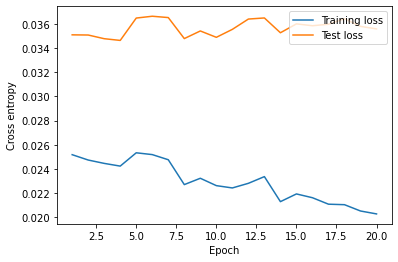

In [18]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), test_loss_lst, label='Test loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

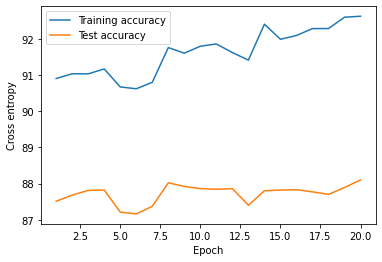

In [19]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), test_acc_lst, label='Test accuracy')
plt.legend(loc='upper left')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

In [20]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

Test accuracy: 88.10%


## 6) Discussion

**1) 학습, 테스트 정확도는 얼마인가요? (위 숫자를 복사하세요.)**

- Training:  92.62%
- Test: 88.10%

**2) overfitting을 경험했나요? 만약 그랬다면 왜 그랬을지 적어보고, overfitting을 방지하기위한 간단한 방법은 무엇일까요?**

`1`
batch 사이즈가 작을 수록 weight 업데이트가 자주 일어나며 training set에 맞춘 값으로 되는 것 같다. 즉, 일반화 능력이 사라진다. 

`>>`
batch size를 늘리기 ( 10 -> 32) 

`2`
perceptron의 개수가 많아질 수록 weight의 개수가 많아져 training set을 더 세세히 학습하게 된다. 

`>>`
layer의 perceptron 개수를 줄여 모델의 복잡도를 낮춘다. 

예를 들면, 

- batch size를 256으로 변경
- 두개의 hidden layers의 activation을 relu로 변경
- learning rate를 0.2로 변경

**3) 만약 테스트셋의 정확도가 85%에서 88%로 3% 향상되었다고 하면 얼마나 많은 이미지를 더 맞추게 된것일까요?**

the number of test set images * accuracy increase = 10,000 * 0.03 = 300

즉 `300장` 더 많은 이미지를 맞추게 되었다. 

**4) 구현하면서 든 질문에 대해 적어보세요. 그리고 질문에 답할 수 있다면 스스로 답해보세요.**

1. learning rate과 batch size는 상관관계가 있을까?
* 있다. batch size가 큰데 learning rate가 적절히 크지 않다면, converging이 너무 천천히 이루어지기 떄문에 제대로 된 학습이 이루어지지 않는다. batch size를 키우면 그에 맞게 learning rate도 크게 조정해야하고, 낮추면 그에 맞게 lr rate도 낮춰야 한다. 
    * batch : 10 -> lr rate : 0.002 일때 accuracy : 88.10 
    * batch : 32 -> lr rate : 0.002 일때 accuracy : 84.70
    * batch : 32 -> lr rate : 0.004 일때 accuracy : 87.16
    

2. perceptron의 개수는 많을수록 좋을까? 많다면 classification 개수의 몇배까지 있는게 좋을까??? 

--> 이건 해결 못했습니다..